In [2]:
#Prepare your workstation
# Import necessary libraries.
# Creating the linear regression
import numpy as np
import pandas as pd
import pylab as py
import sklearn

# Visualise the linear regression.
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from scipy import stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Import the statsmodels.
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [3]:
# Create a DataFrame
# Read the provided CSV file/data set.
df = pd.read_csv('UsedFord.csv') 

# View the DataFrame.
print(df.head())

print(df.info())
df.describe()

   Price  Mileage  Color
0   14.6     37.4      1
1   14.1     44.8      1
2   14.0     45.8      3
3   15.6     30.9      3
4   15.6     31.7      2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    100 non-null    float64
 1   Mileage  100 non-null    float64
 2   Color    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None


,Price,Mileage,Color
count,100.00000,100.000000,100.000000
mean,14.84100,36.011000,1.960000
std,0.54774,6.596125,0.839913
min,13.60000,19.100000,1.000000
25%,14.47500,32.175000,1.000000
50%,14.70000,36.200000,2.000000
75%,15.20000,40.275000,3.000000
max,16.40000,49.200000,3.000000


In [4]:
# Define the dependent variable.
y = df['Price'] 

# Define the independent variable.
x = df['Mileage'] 

# Determine correlation
df.corr()

,Price,Mileage,Color
Price,1.000000,-0.805168,-0.031529
Mileage,-0.805168,1.000000,-0.043313
Color,-0.031529,-0.043313,1.000000


In [1]:
# Visualise the data
# Start with a visualisation BEFORE running linear regression.
plt.figure(figsize=(8, 4), dpi=100)
# plt.figure(dpi=120)
plt.title("Scatterplot of Price versus Mileage, by Color")
plt.xlabel("Mileage (,000 miles)")
plt.ylabel("Price ($000s)")
sns.scatterplot(data=df,
               x= "Mileage",
               y= "Price",
#               hue = "Color",
               palette = "dark")

# Set axis values.
plt.ylim(13, 17)
plt.xlim(15, 55)
plt.show()

NameError: name 'plt' is not defined

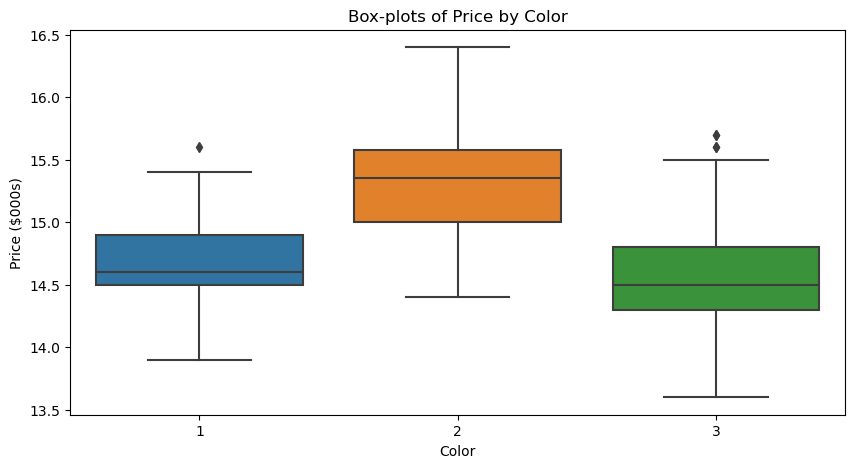

In [6]:
# Visualise the data
# Box-plots of Price by Color
plt.figure(figsize=(10, 5), dpi=100)
plt.title("Box-plots of Price by Color")
sns.boxplot(data=df, y="Price", x="Color") 
plt.ylabel("Price ($000s)")
plt.show()

In [7]:
# Fit the linear model.
# Polyfit() good to use for simple linear regression (only one variable).
# Degree = 1, degree of polynomium, for SLR always 1.
reg = np.polyfit(df['Mileage'], df['Price'], deg = 1)

# View output.
reg

array([-0.06686089, 17.24872734])

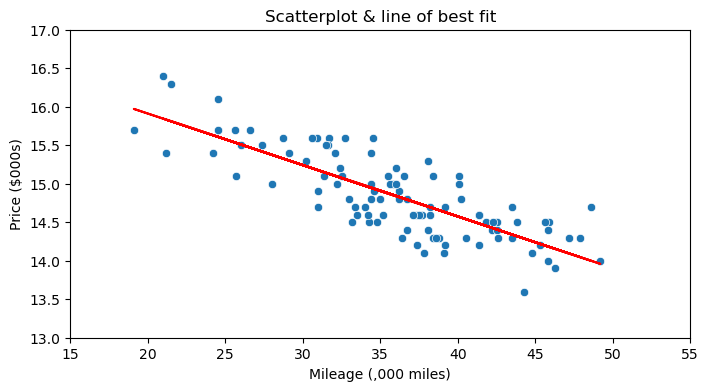

In [8]:
# Add a trendline to visualise the linear regression.
# Use the NumPy polyval method, specify the regression and the independent variable.
trend = np.polyval(reg, df['Mileage'])

# View the previous scatterplot.
plt.figure(figsize=(8, 4), dpi=100)

plt.title("Scatterplot & line of best fit")
plt.xlabel("Mileage (,000 miles)")
plt.ylabel("Price ($000s)")

sns.scatterplot(data=df, 
                x='Mileage', 
                y='Price')

# Set axis values.
plt.ylim(13, 17)
plt.xlim(15, 55)

# Add the trendline.
plt.plot(df['Mileage'], 
         trend,
         color='red')
plt.show()

In [9]:
# Pass linear regression through OLS methods.
test = ols('y ~ x', data = df).fit()

# Print the regression table.
test.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     180.6
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           5.75e-24
Time:                        11:55:52   Log-Likelihood:                -28.948
No. Observations:                 100   AIC:                             61.90
Df Residuals:                      98   BIC:                             67.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.2487      0.182     94.725      0.000      16.887      17.610
x             -0.0669      0.005    -13.440      0.000      -0.077      -0.057
==============================================================================
Omnibus:                        5.847   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                2.691
Skew:                           0.042   Prob(JB):                        0.260
Kurtosis:                       2.201   Cond. No.                         204.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# You can extract the predicted values.
print("Predicted values: ", test.predict())  


Predicted values:  [14.74813023 14.25335968 14.18649879 15.18272599 15.12923728 14.97545724
 14.1798127  15.97168443 14.56760584 14.56091975 15.08243466 14.34027883
 15.06237639 14.9420268  14.72807196 14.48068669 15.61063565 14.85510765
 13.99928831 15.63069392 14.65452499 14.19987097 15.32981993 14.69464152
 14.79493285 15.07574857 14.63446673 14.21992924 14.94871289 14.68126934
 15.09580683 15.47022779 15.00888768 14.45394233 14.79493285 14.74144414
 15.53708868 14.56760584 15.1760399  14.42719798 14.74813023 14.94871289
 15.20278425 14.40713971 14.68126934 14.54086149 15.51034432 14.15306835
 14.92196853 15.41673908 14.04609093 14.86847982 14.40713971 14.32022056
 14.34027883 14.95539897 14.48068669 14.90859636 14.48068669 15.2295286
 14.09289355 15.61063565 15.83127657 14.87516591 15.37662255 14.70132761
 14.42051189 13.95917178 15.01557377 14.72138588 14.84173547 14.70132761
 14.89522418 15.84464875 14.18649879 14.82836329 14.94871289 14.28679012
 15.10249292 14.93534071 15.17603

In [11]:
# Create the linear regression model.
New_value = 40
y_pred = (17.2487) -0.0669 * New_value

# View the output
print("If Milage is", New_value, "the predicted Price is : ", y_pred)  


If Milage is 40 the predicted Price is :  14.5727


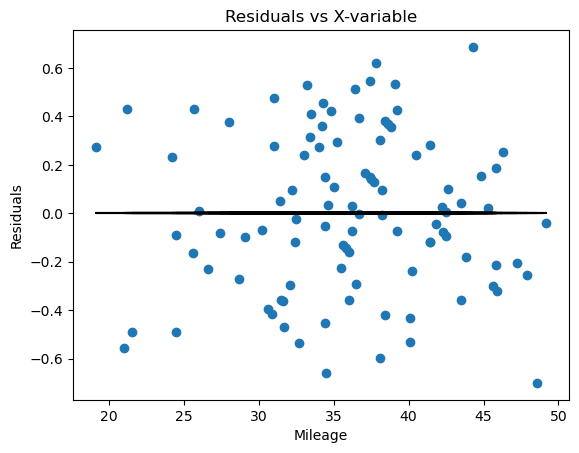

In [21]:
# Plot the residuals=(y-predict - y-observe) versus the x-values.
# Ideally, there should be no pattern in this plot

plt.scatter(x, test.predict()- y)
plt.plot(x, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Mileage")
plt.ylabel("Residuals")
plt.show()

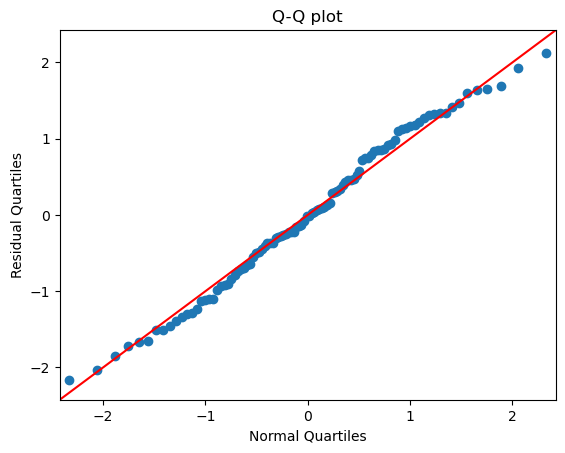

In [13]:
# Import qqplot library
from statsmodels.graphics.gofplots import qqplot

# Residuals are calcualted
residuals = test.predict() - y  

# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them

sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()
